In [1]:
import csv
import matplotlib.pyplot as pyplot
from matplotlib.collections import BrokenBarHCollection

In [2]:
chrom, telom, centrom, allgenesYESdirect, allgenesYESindirect, allgenesNO, temp, not1 = [],[],[],[], [], [], [], []
a = 0

allgenesYES =[]

for i in range(0,17):
   telom.append([])
   centrom.append([])
   allgenesYESdirect.append([])
   allgenesYESindirect.append([])
   allgenesNO.append([])

with open("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/All Data/outputchrom.csv") as f:
    data = csv.reader(f)
    for line in data:
        chrom.append(int(line[2]))

with open("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/All Data/outputtelom.csv") as f:
    data = csv.reader(f)
    for line in data:
        telom[int(line[0])-1].append((int(line[1]),int(line[2])))

with open("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/All Data/outputcentrom.csv") as f:
    data = csv.reader(f)
    for line in data:
        centrom[int(line[0])-1].append((int(line[1]),int(line[2])))

with open("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/All Data/outputregulatedgenes2.csv") as f:
    data = csv.reader(f)
    for line in data:
        temp.append((line[0],line[1]))

                    
#x = 0
with open("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/All Data/allgenesformatted1.csv") as f:
    data = csv.reader(f)
    for line in data:
       if line[1] == "DUR1,2":
          line[1] = "DUR1"
       if line[1] == "ARG5,6":
          line[1] = "ARG5"
       if line[0] != "mt":
        for itemer in temp:
         #x = x+1 
         #if x< 20:
                #print(itemer)
         if line[1] == itemer[0] and itemer[1] == "Direct":
             allgenesYESdirect[int(line[0])-1].append((int(line[2]),int(line[3])))
             not1.append(line[1])
         elif line[1] == itemer[0] and itemer[1] == "Indirect":
             allgenesYESindirect[int(line[0])-1].append((int(line[2]),int(line[3])))
             not1.append(line[1])
         else:
             allgenesNO[int(line[0])-1].append((int(line[2]),int(line[3])))
       else:
         if line[1] in temp:
             allgenesYES.append((int(line[2]),int(line[3])))
             not1.append(line[1])
         else:
             allgenesNO[16].append((int(line[2]),int(line[3])))


In [5]:
print(len(temp))
allgenesYESdirect = [list(set(chromo)) for chromo in allgenesYESdirect]
allgenesYESindirect = [list(set(chromo)) for chromo in allgenesYESindirect]
allgenesNO = [list(set(chromo)) for chromo in allgenesNO]
print(sum([len(listElem) for listElem in allgenesYESdirect]))
print(sum([len(listElem) for listElem in allgenesYESindirect]))

12433
6006
6138


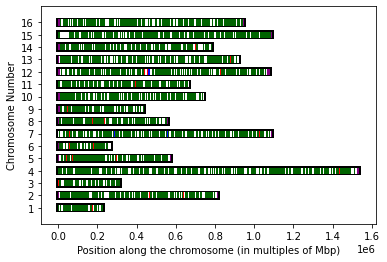

In [11]:
yticks = []
yranges = []
yranges2 = []
yranges3 = []
yranges4 = []

for i in range(1,17):
   yranges.append([i*20, 10])
   yranges2.append([(i*20)-2.5, 2.5])
   yranges3.append([(i*20)+10,2.5])
   yranges4.append([(i*20)-5, 20])
   yticks.append(i*20+5)


fig = pyplot.figure()
ax = fig.add_subplot(111)

for i in range(0,16):
    coll = BrokenBarHCollection([(-10000,10000),(chrom[i], 10000)], yranges[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(coll)
    col2 = BrokenBarHCollection(telom[i], yranges[i], facecolor="purple", zorder= 0.5)
    ax.add_collection(col2)
    col3 = BrokenBarHCollection(centrom[i], yranges4[i], facecolor="brown", zorder= 0.5)
    ax.add_collection(col3)
    col4 = BrokenBarHCollection([(-10000,chrom[i]+ 20000)], yranges2[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col4)
    col5 = BrokenBarHCollection([(-10000,chrom[i]+ 20000)], yranges3[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col5)
    col6 = BrokenBarHCollection(allgenesYESdirect[i], yranges[i], facecolor="blue", zorder= 0.3)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col6)
    col7 = BrokenBarHCollection(allgenesNO[i], yranges[i], facecolor="red", zorder= 0.2)
    ax.add_collection(col7)
    col8 = BrokenBarHCollection(allgenesYESindirect[i], yranges[i], facecolor="darkgreen", zorder= 0.3)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col8)

yticklabels = []
for a in range(1,17):
    yticklabels.append(a)

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels) 
pyplot.ylabel("Chromosome Number")
pyplot.xlabel("Position along the chromosome (in multiples of Mbp)")
ax.axis('tight')
pyplot.savefig("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/SCerevisiae.pdf")

